Implement the method of power iteration to approximate the top 10 PCs from HapMap3 data (see Galinsky et al. 2016a Am J Hum Genet). 


In cases of subtle structure (e.g. 2 populations with low Fst, or a single admixed population), investigate how accuracy of inferred ancestry varies with (a) number of SNPs used, (b) number of samples used, (c) whether or not other populations not relevant to the subtle structure are included in the data set. Discuss. 

*********
First part:
Include all ancestries?
Include all individuals? # does population size matter?
Include all 23 chromosomes?

#rare variants

How large is the data if we use all 23 chromosomes? Should we aim to use SNPs all 23 chromosomes for better accuracy?

(a) how do we assess the accuracy of inferred ancestry? How do we determine the inferred ancestry from PCs? clusters?
(c) other populations not relevant to the subtle structure <- does this mean a population that is very distant to the admixed population?


1. data pre-processing (data selection 1. standardize in some way? large/small population 2. which chromosome (based on number of SNPs) 3. how to handle rare/non-rare SNPs)
2. measures after method (accuracy?)
3. clarification on (c) distant to subtle structure. 


## This notebook includes analysis of performance in clustering between closely related groups, CHB and JPT when adding distant groups, YRI and CEU

In [6]:
import numpy as np
import pandas as pd

In [7]:
import sys
#update the path to include the hw_data directory
path = "/Users/tinaryu/stat_gen/hw_data"

sys.path.append(path) 
#sys.path is a list of directories that Python searches when you use import statement
#append then adds the hw_data to the directories to be searched
from CB_02704 import *

In [8]:
from PowerIteration_Functions import *

In [28]:
pop_labels = ['CHB','JPT','YRI','CEU']

In [29]:
#This may take a while
genos = []
for pop in pop_labels:
    print('reading', pop)
    genos.append(read_geno_pop(pop))


reading CHB
reading JPT
reading YRI
reading CEU


In [30]:
def GetCombinedGeno(genos, n): #n is the number of individuals to be included
    subsets = []
    # Slice the first n columns of each array
    for geno in genos:
        subsets.append(geno[:,:n])

    # Horizontally stack the sliced arrays
    combined = np.ma.hstack(subsets)
    return combined

In [31]:
comb = GetCombinedGeno(genos, 80)

In [32]:
CHB_JPT = comb[:, :160]
CHB_JPT_YRI = comb[:, :240]
CHB_JPT_YRI_CEU = comb

In [37]:
import matplotlib.pyplot as plt

def PlotPCA(comb_genos, pop_labels, n):
    # Fixed color mapping for populations
    color_map = {
        'CHB': '#1f77b4',  # Blue
        'JPT': '#ff7f0e',  # Orange
        'YRI': '#2ca02c',  # Green
        'CEU': '#d62728',  # Red
    }
    
    # Fallback for populations not in the map
    default_colors = plt.cm.tab10(np.linspace(0, 1, len(pop_labels)))
    fixed_colors = [color_map.get(pop, default_colors[i]) for i, pop in enumerate(pop_labels)]

    # Generate PCA and distance ratio
    top10PCs = RunPowerIteration10PCs(comb_genos)
    k = len(pop_labels)
    DistanceRatio = GetDistanceRatio(top10PCs, k, n)

    # Plotting
    plt.figure(figsize=(8, 6))
    for i in range(k):
        population_indices = range(i * n, (i + 1) * n)  # Indices for each population
        population_label = pop_labels[i]  # Label for the current population
        population_color = fixed_colors[i]  # Use the fixed color for the population

        plt.scatter(
            top10PCs[0][population_indices],
            top10PCs[1][population_indices],
            c=[population_color],
            label=population_label,
            s=20
        )

    # Add labels and title
    plt.title(f"PCA of Populations {pop_labels} (n={n} and all SNPs)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
    plt.grid(True)
    plt.tight_layout()  # Adjust layout for readability
    plt.show()

    return DistanceRatio

Power iteration: converged at iter=31
Power iteration: converged at iter=767
Power iteration: converged at iter=247
Power iteration: converged at iter=3266
Power iteration: converged at iter=2
Power iteration: converged at iter=1831
Power iteration: converged at iter=2889
Power iteration: converged at iter=1
Power iteration: converged at iter=3179
Power iteration: converged at iter=648


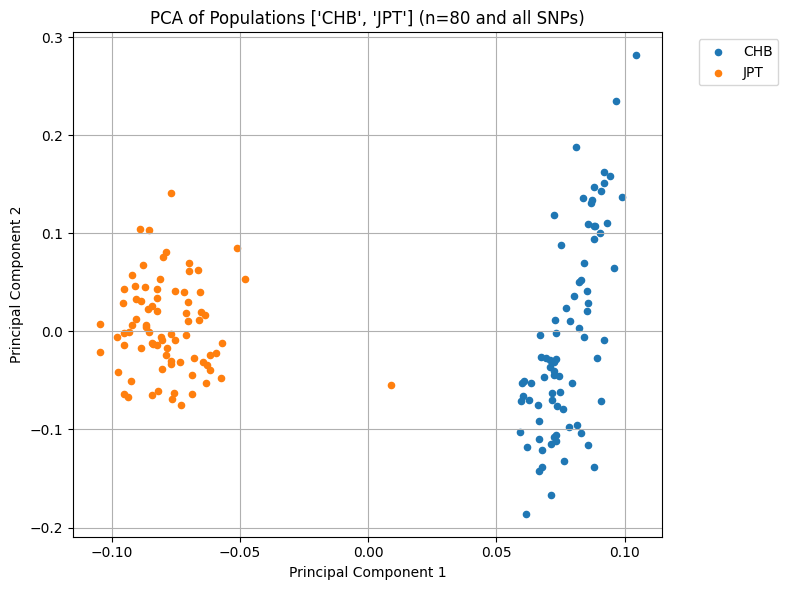

array([1.81284194, 3.81695144])

In [38]:
PlotPCA(CHB_JPT, ['CHB', 'JPT'], 80)

Power iteration: converged at iter=6
Power iteration: converged at iter=29
Power iteration: converged at iter=961
Power iteration: converged at iter=1
Power iteration: converged at iter=469
Power iteration: converged at iter=2251
Power iteration: converged at iter=1479
Power iteration: converged at iter=2
Power iteration: converged at iter=257
Power iteration: converged at iter=3183


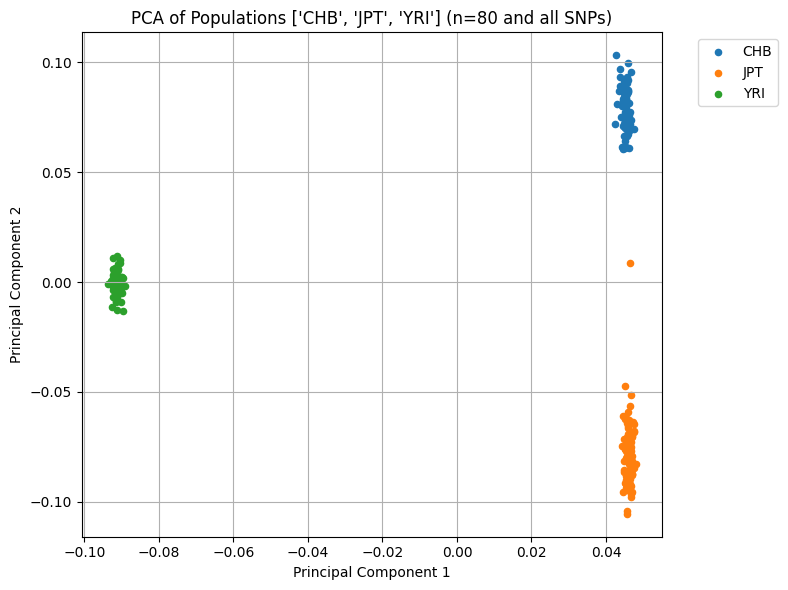

array([17.40694374, 14.15791502, 41.10858022])

In [39]:
PlotPCA(CHB_JPT_YRI, ['CHB', 'JPT','YRI'], 80)

Power iteration: converged at iter=22
Power iteration: converged at iter=1
Power iteration: converged at iter=46
Power iteration: converged at iter=23
Power iteration: converged at iter=1424
Power iteration: converged at iter=54717
Power iteration: converged at iter=2
Power iteration: converged at iter=2294
Power iteration: converged at iter=1372
Power iteration: converged at iter=849


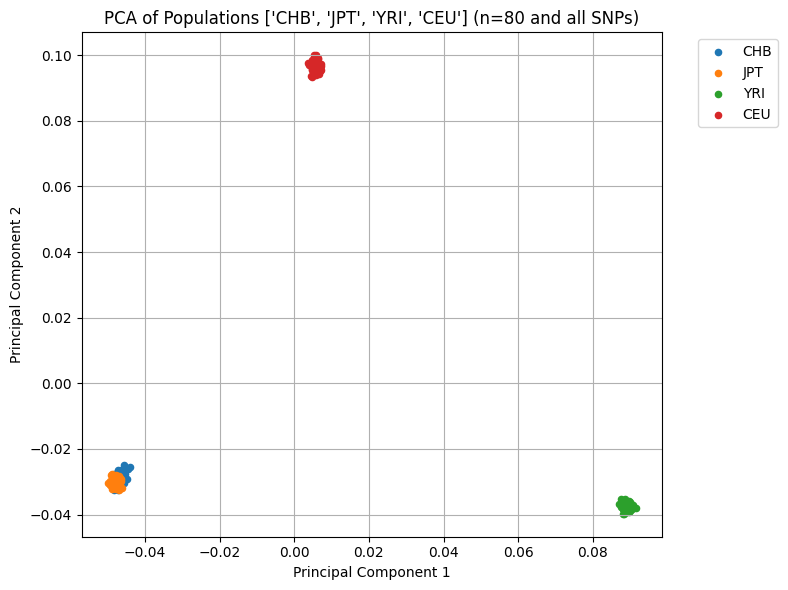

array([ 62.39311132,  76.11586213, 142.74688503, 106.85473546])

In [43]:
PlotPCA(CHB_JPT_YRI_CEU, ['CHB', 'JPT','YRI','CEU'], 80)